# Analysis Notebook – Analysis of antibody CDR dynamics

**Author:** Fabian C. Spoendlin 

**Date:** November, 2025 

**Version:** v1.0

**Contact email:** matteo.cagiada@bio.ku.dk / fabian.spoendlin@stats.ox.ac.uk

---

## Overview

This Jupyter notebook accompanies the paper:

> **Uncovering the flexibility of CDR loops in antibodies and TCRs through large-scale molecular dynamics**  
> Matteo Cagiada, Fabian C. Spoendlin, King Ifashe, Charlotte M. Deane
> biorxiv - 2025

---

## How to Run

To run this notebook, clone the GitHub repository and run it. The files are already in the correct folders to execture the notebook.

### Requirements
- **Python version:** 3.9+  
- **Environment:** Conda
- **Dependencies:** numpy, pandas, matplotlib, seaborn

## Functions

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

custom_palette = ['#86CB92', '#71B48D', '#404E7C', '#251F47', '#260F26']

## Load data

In [31]:
df = pd.read_hdf('../src/antibody_CDR_dynamics/antibody_CDRsim_flexibility.h5', key="antibody_CDRsim_flexibility")

### Median RMSD/RMSF

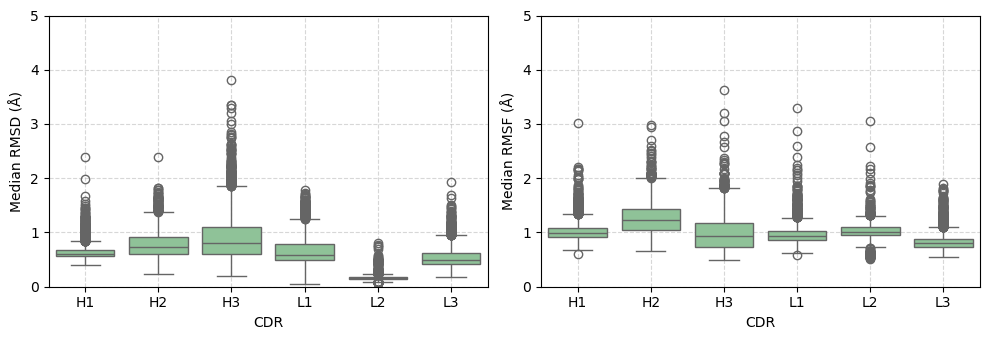

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

for j, chain in enumerate(['heavy', 'light']):
    for i, cdr in enumerate(['cdr1', 'cdr2', 'cdr3']):
        x = i + j * 3
        sns.boxplot(y=df[f'median_rmean_{cdr}_{chain}'], x=x, ax=axes[0], color=custom_palette[0])

for j, cdr in enumerate(['CDRH1', 'CDRH2', 'CDRH3', 'CDRL1', 'CDRL2', 'CDRL3']):
    sns.boxplot(y=df[f'median_rmsf_{cdr}'], x=j, ax=axes[1], color=custom_palette[0])

axes[0].set_ylabel('Median RMSD (Å)')
axes[1].set_ylabel('Median RMSF (Å)')
for ax in axes:
    ax.set_xticks([0, 1, 2, 3, 4, 5])
    ax.set_xticklabels(['H1', 'H2', 'H3', 'L1', 'L2', 'L3'])

    ax.set_xlabel('')
    ax.grid(which='both', axis='both', linestyle='--', alpha=0.5)
    ax.set_ylim(0, 5)
    ax.set_xlabel('CDR')

fig.tight_layout()
fig.savefig('../figures/median_rmsd_rmsf_cdrs.pdf')

### H3 RMSD/RMSF vs length

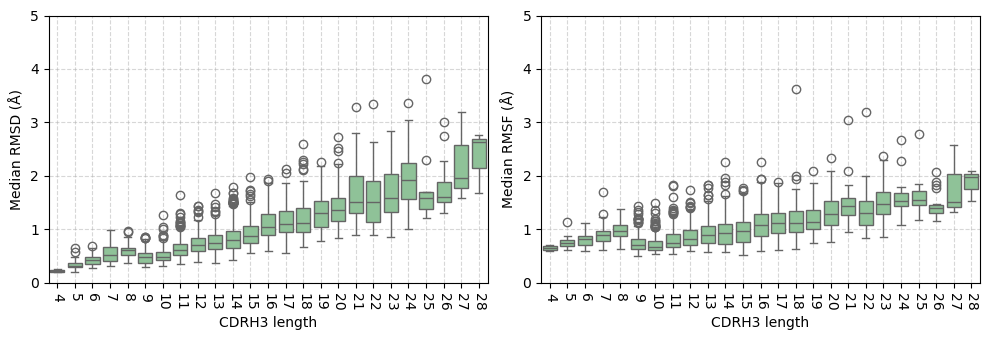

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

sns.boxplot(y=df['median_rmean_cdr3_heavy'], x=df['CDRH3_length'], ax=axes[0], color=custom_palette[0])
sns.boxplot(y=df['median_rmsf_CDRH3'], x=df['CDRH3_length'], ax=axes[1], color=custom_palette[0])

axes[0].set_ylabel('Median RMSD (Å)')
axes[1].set_ylabel('Median RMSF (Å)')
for ax in axes:
    ax.set_xlabel('CDRH3 length')
    ax.grid(which='both', axis='both', linestyle='--', alpha=0.5)
    ax.set_ylim(0, 5)
    ax.tick_params(axis='x', rotation=-90)

fig.tight_layout()
fig.savefig('../figures/median_rmsd_rmsf_cdr3_length.pdf')

### RMSD vs RMSF

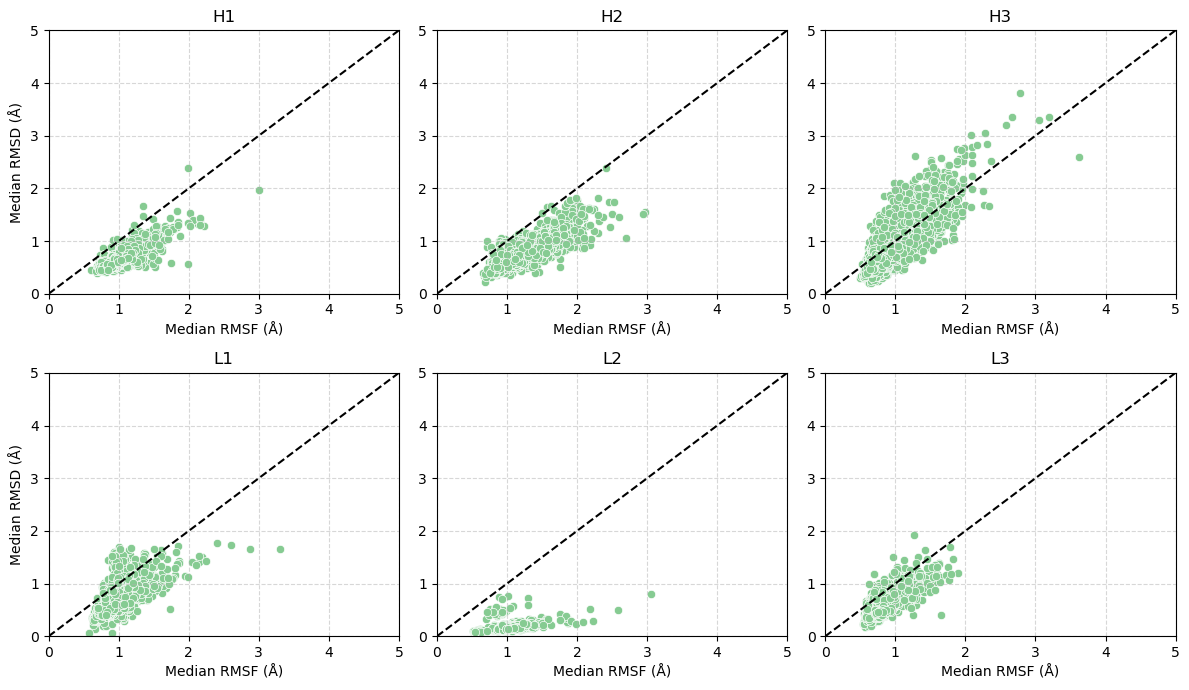

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))

axes = axes.flatten()

sns.scatterplot(y=df['median_rmean_cdr1_heavy'], x=df['median_rmsf_CDRH1'], ax=axes[0], color=custom_palette[0])
sns.scatterplot(y=df['median_rmean_cdr2_heavy'], x=df['median_rmsf_CDRH2'], ax=axes[1], color=custom_palette[0])    
sns.scatterplot(y=df['median_rmean_cdr3_heavy'], x=df['median_rmsf_CDRH3'], ax=axes[2], color=custom_palette[0])
sns.scatterplot(y=df['median_rmean_cdr1_light'], x=df['median_rmsf_CDRL1'], ax=axes[3], color=custom_palette[0])
sns.scatterplot(y=df['median_rmean_cdr2_light'], x=df['median_rmsf_CDRL2'], ax=axes[4], color=custom_palette[0])
sns.scatterplot(y=df['median_rmean_cdr3_light'], x=df['median_rmsf_CDRL3'], ax=axes[5], color=custom_palette[0])

names = ['H1', 'H2', 'H3', 'L1', 'L2', 'L3']
for ax in axes:
    ax.set_xlabel('Median RMSF (Å)')
    ax.set_ylabel('')

    ax.grid(which='both', axis='both', linestyle='--', alpha=0.5)
    ax.set_ylim(0, 5)
    ax.set_xlim(0, 5)
    ax.plot([0, 5], [0, 5], color='black', linestyle='--', alpha=1)
    ax.set_title(names.pop(0))
axes[0].set_ylabel('Median RMSD (Å)')
axes[3].set_ylabel('Median RMSD (Å)')

fig.tight_layout()
fig.savefig('../figures/median_rmsd_rmsf_cdrs_scatter.pdf')